# CVD - KNN Classifier - Period 1

In [1]:
#import dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
#read in data set
df = pd.read_csv("Resources/cvd_period1_data.csv")
df.head(20)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVAP,PREVHYP,DEATH,CVD
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,1
1,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0,0
2,9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0,0
3,10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,1,1,1
4,11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0,0,0
5,11263,2,228.0,43,180.0,110.0,0,0.0,30.30,0,0.0,77.0,99.0,0,1,0,1
6,12629,2,205.0,63,138.0,71.0,0,0.0,33.11,0,0.0,60.0,85.0,0,0,0,0
7,12806,2,313.0,45,100.0,71.0,1,20.0,21.68,0,0.0,79.0,78.0,0,0,0,0
8,14367,1,260.0,52,141.5,89.0,0,0.0,26.36,0,0.0,76.0,79.0,0,1,0,0
9,16365,1,225.0,43,162.0,107.0,1,30.0,23.61,0,0.0,93.0,88.0,0,1,0,0


In [3]:
cvd_df = df.set_index('RANDID')
#Remove columns not involved in analysis
cvd_df = cvd_df[['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVAP',
       'PREVHYP', 'CVD']]
cvd_df.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVAP,PREVHYP,CVD
RANDID,,,,,,,,,,,,,,,
2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,1
6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0
9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0
10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,1,1
11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0,0


In [4]:
y = cvd_df["CVD"]
target_names = ["negative", "positive"]

In [5]:
X = cvd_df.drop("CVD", axis=1)
X.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVAP,PREVHYP
RANDID,,,,,,,,,,,,,,
2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0
6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0
9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0
10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,1
11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=49)

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.685
k: 3, Train/Test Score: 0.842/0.722
k: 5, Train/Test Score: 0.807/0.747
k: 7, Train/Test Score: 0.794/0.749
k: 9, Train/Test Score: 0.782/0.748
k: 11, Train/Test Score: 0.783/0.748
k: 13, Train/Test Score: 0.782/0.759
k: 15, Train/Test Score: 0.778/0.759
k: 17, Train/Test Score: 0.778/0.755
k: 19, Train/Test Score: 0.773/0.759


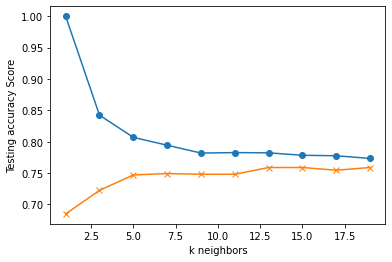

In [10]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Choose K = 13 from above and re-fit the KNN Classifier using that k value.
# Note that k = 13 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.759


In [45]:
#Make predictions (0 = no event occurred, 1 = event occurred)
predictions = knn.predict(X_test_scaled)
cvd_predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
cvd_predictions

,Prediction,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
928,0,0
929,0,0
930,0,0
931,0,0


In [46]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.78      0.98      0.86       707
    positive       0.61      0.12      0.20       226

    accuracy                           0.77       933
   macro avg       0.69      0.55      0.53       933
weighted avg       0.74      0.77      0.70       933



In [47]:
p0a0 = cvd_predictions.loc[(cvd_predictions['Prediction']==0) & (cvd_predictions['Actual']==0)]
p1a1 = cvd_predictions.loc[(cvd_predictions['Prediction']==1) & (cvd_predictions['Actual']==1)]
p0a1 = cvd_predictions.loc[(cvd_predictions['Prediction']==0) & (cvd_predictions['Actual']==1)]
p1a0 = cvd_predictions.loc[(cvd_predictions['Prediction']==1) & (cvd_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0:  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1:  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1:  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0:  {len(p1a0)}")

Event prediction = 0 and actual = 0:  690
Event prediction = 1 and actual = 1:  27
Event prediction = 0 and actual = 1:  199
Event prediction = 1 and actual = 0:  17


In [48]:
TP = len(p1a1)
TN = len(p0a0)
FP = len(p1a0)
FN = len(p0a1)

Accuracy = (TP + TN)/len(cvd_predictions)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
F1 = 2*((Precision*Recall)/ (Precision+Recall))

print("Accuracy: %.3f" % Accuracy)
print("Precision: %.3f" % Precision)
print("Recall: %.3f" % Recall)
print("F1 Measure: %.3f" % F1)

print(TP,TN,FP,FN, len(cvd_predictions))

Accuracy: 0.768
Precision: 0.614
Recall: 0.119
F1 Measure: 0.200
27 690 17 199 933


## Separating by gender

In [14]:
#filter df by gender (males = 1, females = 2)
male_cvd = cvd_df.loc[(cvd_df["SEX"] ==1)]
female_cvd = cvd_df.loc[(cvd_df["SEX"] ==2)]

In [15]:
male_cvd_df = male_cvd.drop('SEX', axis=1)
female_cvd_df = female_cvd.drop('SEX', axis=1)

In [16]:
y_male = male_cvd_df["CVD"]
male_target_names = ["negative", "positive"]

y_female = female_cvd_df["CVD"]
female_target_names = ["negative", "positive"]

In [17]:
X_male = male_cvd_df.drop("CVD", axis=1)
X_female = female_cvd.drop("CVD", axis=1)

In [18]:
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, random_state=49)
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, random_state=49)

In [19]:
# Create a StandardScater model and fit it to the training data - male

X_male_scaler = StandardScaler().fit(X_male_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_male_train_scaled = X_male_scaler.transform(X_male_train)
X_male_test_scaled = X_male_scaler.transform(X_male_test)

In [20]:
m_train_scores = []
m_test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_male_train_scaled, y_male_train)
    train_score = knn.score(X_male_train_scaled, y_male_train)
    test_score = knn.score(X_male_test_scaled, y_male_test)
    m_train_scores.append(train_score)
    m_test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.644
k: 3, Train/Test Score: 0.794/0.668
k: 5, Train/Test Score: 0.769/0.680
k: 7, Train/Test Score: 0.745/0.690
k: 9, Train/Test Score: 0.739/0.678
k: 11, Train/Test Score: 0.723/0.678
k: 13, Train/Test Score: 0.717/0.709
k: 15, Train/Test Score: 0.708/0.709
k: 17, Train/Test Score: 0.711/0.709
k: 19, Train/Test Score: 0.712/0.700


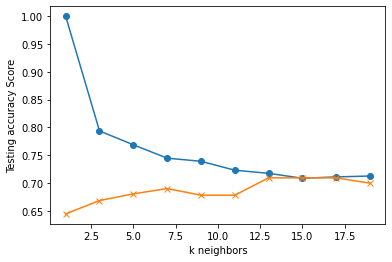

In [21]:
plt.plot(range(1, 20, 2), m_train_scores, marker='o')
plt.plot(range(1, 20, 2), m_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [22]:
# Choose K = 13 from above and re-fit the KNN Classifier using that k value.
# Note that k = 13 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_male_train_scaled, y_male_train)
print('k=13 Test Acc: %.3f' % knn.score(X_male_test_scaled, y_male_test))

k=13 Test Acc: 0.709


In [23]:
#Make predictions (0 = no event occurred, 1 = event occurred)
m_predictions = knn.predict(X_male_test_scaled)
m_cvd_predictions = pd.DataFrame({"Prediction": m_predictions, "Actual": y_male_test}).reset_index(drop=True)
m_cvd_predictions

,Prediction,Actual
0,0,1
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
411,1,1
412,0,0
413,0,1
414,0,0


In [36]:
mp0a0 = m_cvd_predictions.loc[(m_cvd_predictions['Prediction']==0) & (m_cvd_predictions['Actual']==0)]
mp1a1 = m_cvd_predictions.loc[(m_cvd_predictions['Prediction']==1) & (m_cvd_predictions['Actual']==1)]
mp0a1 = m_cvd_predictions.loc[(m_cvd_predictions['Prediction']==0) & (m_cvd_predictions['Actual']==1)]
mp1a0 = m_cvd_predictions.loc[(m_cvd_predictions['Prediction']==1) & (m_cvd_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0 (male):  {len(mp0a0)}")
print(f"Event prediction = 1 and actual = 1 (male):  {len(mp1a1)}")
print(f"Event prediction = 0 and actual = 1 (male):  {len(mp0a1)}")
print(f"Event prediction = 1 and actual = 0 (male):  {len(mp1a0)}")

Event prediction = 0 and actual = 0 (male):  257
Event prediction = 1 and actual = 1 (male):  38
Event prediction = 0 and actual = 1 (male):  76
Event prediction = 1 and actual = 0 (male):  45


In [37]:
TP = len(mp1a1)
TN = len(mp0a0)
FP = len(mp1a0)
FN = len(mp0a1)

Accuracy = (TP + TN)/len(m_cvd_predictions)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
F1 = 2*((Precision*Recall)/ (Precision+Recall))

print("Accuracy: %.3f" % Accuracy)
print("Precision: %.3f" % Precision)
print("Recall: %.3f" % Recall)
print("F1 Measure: %.3f" % F1)

Accuracy: 0.709
Precision: 0.458
Recall: 0.333
F1 Measure: 0.386


In [25]:
# Create a StandardScater model and fit it to the training data - female

X_female_scaler = StandardScaler().fit(X_female_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_female_train_scaled = X_female_scaler.transform(X_female_train)
X_female_test_scaled = X_female_scaler.transform(X_female_test)

In [26]:
f_train_scores = []
f_test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_female_train_scaled, y_female_train)
    train_score = knn.score(X_female_train_scaled, y_female_train)
    test_score = knn.score(X_female_test_scaled, y_female_test)
    f_train_scores.append(train_score)
    f_test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.753
k: 3, Train/Test Score: 0.877/0.780
k: 5, Train/Test Score: 0.848/0.792
k: 7, Train/Test Score: 0.847/0.797
k: 9, Train/Test Score: 0.842/0.797
k: 11, Train/Test Score: 0.837/0.797
k: 13, Train/Test Score: 0.837/0.809
k: 15, Train/Test Score: 0.839/0.811
k: 17, Train/Test Score: 0.841/0.805
k: 19, Train/Test Score: 0.836/0.803
k: 21, Train/Test Score: 0.834/0.809
k: 23, Train/Test Score: 0.832/0.811
k: 25, Train/Test Score: 0.832/0.811
k: 27, Train/Test Score: 0.833/0.811
k: 29, Train/Test Score: 0.834/0.811


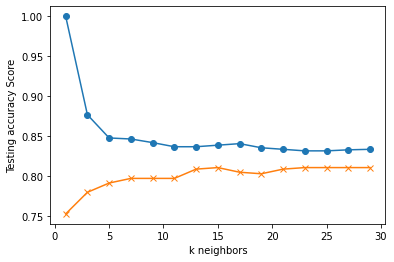

In [27]:
plt.plot(range(1, 30, 2), f_train_scores, marker='o')
plt.plot(range(1, 30, 2), f_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [28]:
# Choose K = 15 from above and re-fit the KNN Classifier using that k value.
# Note that k = 15 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_female_train_scaled, y_female_train)
print('k=15 Test Acc: %.3f' % knn.score(X_female_test_scaled, y_female_test))

k=15 Test Acc: 0.811


In [29]:
#Make predictions (0 = no event occurred, 1 = event occurred)
f_predictions = knn.predict(X_female_test_scaled)
f_cvd_predictions = pd.DataFrame({"Prediction": f_predictions, "Actual": y_female_test}).reset_index(drop=True)
f_cvd_predictions

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
513,0,0
514,0,1
515,0,0
516,0,0


In [38]:
fp0a0 = f_cvd_predictions.loc[(f_cvd_predictions['Prediction']==0) & (f_cvd_predictions['Actual']==0)]
fp1a1 = f_cvd_predictions.loc[(f_cvd_predictions['Prediction']==1) & (f_cvd_predictions['Actual']==1)]
fp0a1 = f_cvd_predictions.loc[(f_cvd_predictions['Prediction']==0) & (f_cvd_predictions['Actual']==1)]
fp1a0 = f_cvd_predictions.loc[(f_cvd_predictions['Prediction']==1) & (f_cvd_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0 (female):  {len(fp0a0)}")
print(f"Event prediction = 1 and actual = 1 (female):  {len(fp1a1)}")
print(f"Event prediction = 0 and actual = 1 (female):  {len(fp0a1)}")
print(f"Event prediction = 1 and actual = 0 (female):  {len(fp1a0)}")

Event prediction = 0 and actual = 0 (female):  411
Event prediction = 1 and actual = 1 (female):  9
Event prediction = 0 and actual = 1 (female):  83
Event prediction = 1 and actual = 0 (female):  15


In [39]:
TP = len(fp1a1)
TN = len(fp0a0)
FP = len(fp1a0)
FN = len(fp0a1)

Accuracy = (TP + TN)/len(f_cvd_predictions)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
F1 = 2*((Precision*Recall)/ (Precision+Recall))

print("Accuracy: %.3f" % Accuracy)
print("Precision: %.3f" % Precision)
print("Recall: %.3f" % Recall)
print("F1 Measure: %.3f" % F1)

Accuracy: 0.811
Precision: 0.375
Recall: 0.098
F1 Measure: 0.155
